# Filter design with Python - playing around from tutorial
[Tutorial: Designing an FIR filter in Python](http://www.ee.iitm.ac.in/~nitin/teaching/ee5480/firdesign.html)

In [1]:
# Import a lot of functions to keep it simple to use
from pylab import * 
import matplotlib.pyplot as plt

## Parâmetros gerais

In [2]:
fs = 1000             # sampling frequency [Hz]
Ts = 1.0/fs           # sampling period [s]

noise_amp = 3.0       # noise amplitude 

# time steps: 1 second of data samples at spacing of 1/1000 seconds
t = arange(0, 1, Ts)

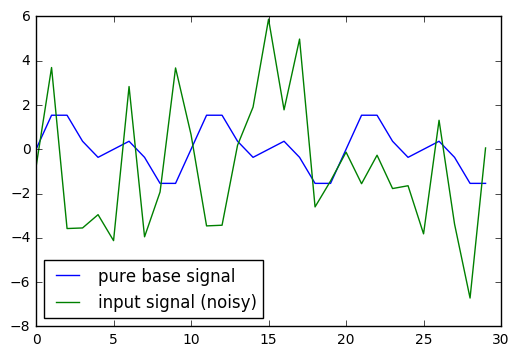

In [3]:
# adds some noise
s_pure = sin(2*pi*100*t) + sin(2*pi*200*t)
s = s_pure + noise_amp*randn(len(t))

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.legend(('pure base signal', 'input signal (noisy)'), loc='best')
plt.show()

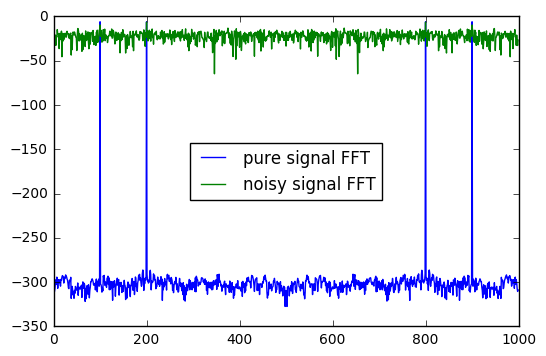

In [4]:
ft_pure = fft(s_pure)/len(s_pure)
ft = fft(s)/len(s)

plt.plot(20*log10(abs(ft_pure)))
plt.plot(20*log10(abs(ft)))
plt.legend(('pure signal FFT', 'noisy signal FFT'), loc='best')
plt.show()

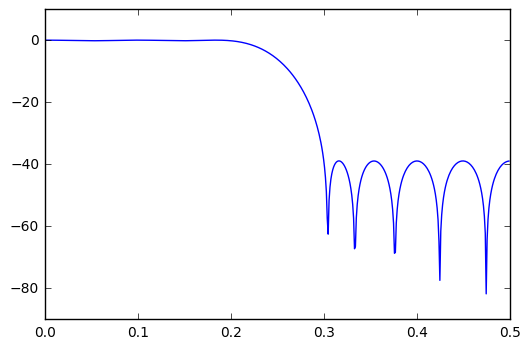

In [5]:
# filter design Remez algorithm
from scipy.signal import remez
lpf1 = remez(21, [0, 0.2, 0.3, 0.5], [1.0, 0.0])

from scipy.signal import freqz
w, h = freqz(lpf1)

plt.plot(w/(2*pi), 20*log10(abs(h))) # w/(2*pi) normalizes X-axis, resulting in 0.5 --> pi
plt.show()

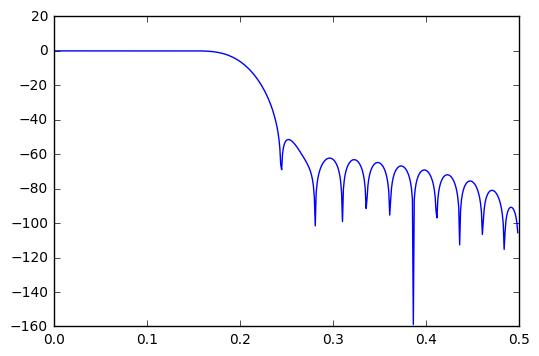

In [6]:
# filter design FIR window algorithm
from scipy.signal import firwin
lpf2 = firwin(numtaps=40, cutoff=0.4, window='hamming') # cutoff is a fraction of Nyquist frequency

from scipy.signal import freqz
w, h = freqz(lpf2)

plt.plot(w/(2*pi), 20*log10(abs(h)))
plt.show()

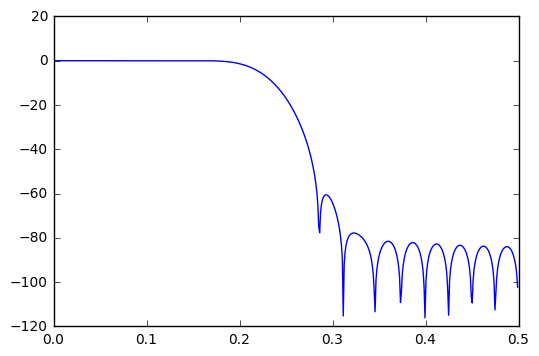

In [7]:
# filter design FIR window 2 algorithm
from scipy.signal import firwin2
lpf3 = firwin2(40, [0.0, 0.4, 0.5, 1.0], [1.0, 1.0, 0.0, 0.0], window='hamming') # cutoff is a fraction of Nyquist frequency

from scipy.signal import freqz
w, h = freqz(lpf3)

plt.plot(w/(2*pi), 20*log10(abs(h)))
plt.show()

## Filtering with `lfilter`

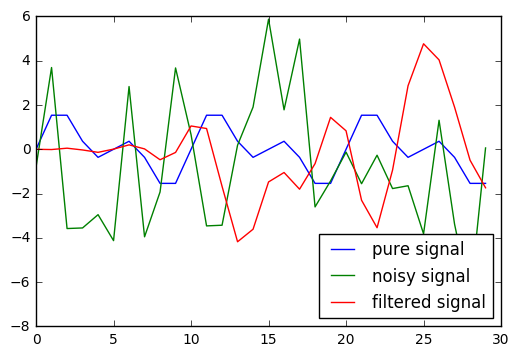

In [8]:
# filtering the signal with lfilter
from scipy.signal import lfilter

sout = lfilter(lpf1, 1, s)

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.plot(sout[:30])
legend(('pure signal', 'noisy signal', 'filtered signal'), loc='best')
plt.show()

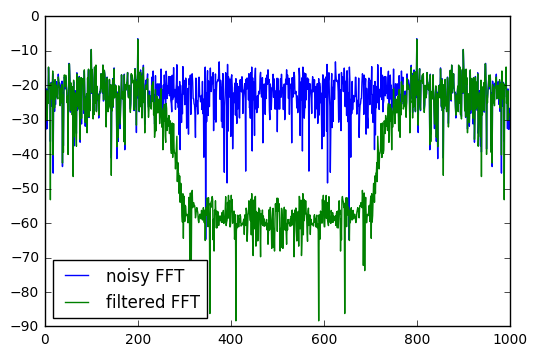

In [9]:
ft = fft(s)/len(s)
ftout = fft(sout)/len(sout)

plt.plot(20*log10(abs(ft)))
plt.plot(20*log10(abs(ftout)))
legend(('noisy FFT', 'filtered FFT'), loc='best')
plt.show()

## Filtering with `filtfilt`
Linear phase, without delay.

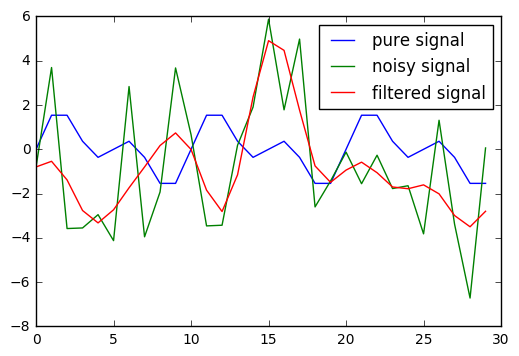

In [10]:
# filtering the signal with filtfilt
from scipy.signal import filtfilt

sout = filtfilt(lpf3, 1, s)

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.plot(sout[:30])
legend(('pure signal', 'noisy signal', 'filtered signal'), loc='best')
plt.show()

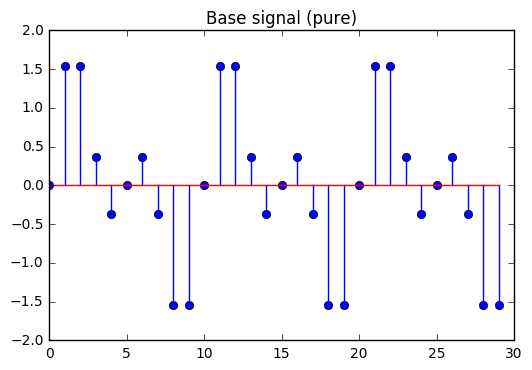

In [11]:
plt.stem(s_pure[:30])
plt.title('Base signal (pure)')
plt.show()

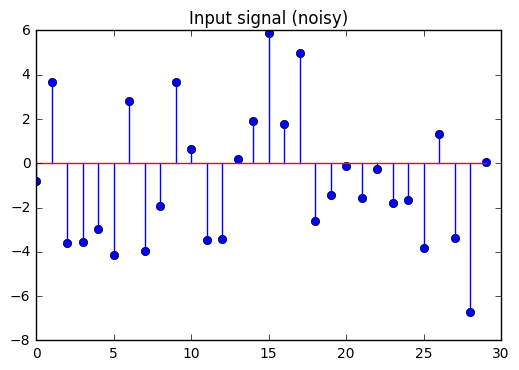

In [12]:
plt.stem(s[:30])
plt.title('Input signal (noisy)')
plt.show()

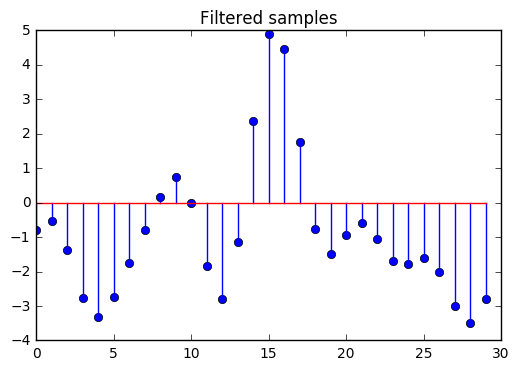

In [13]:
plt.stem(sout[:30])
plt.title('Filtered samples')
plt.show()

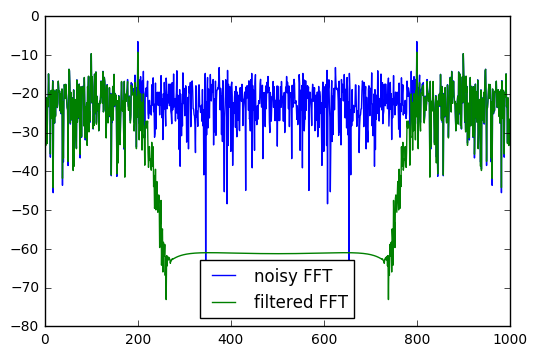

In [14]:
ft = fft(s)/len(s)
ftout = fft(sout)/len(sout)

plt.plot(20*log10(abs(ft)))
plt.plot(20*log10(abs(ftout)))
legend(('noisy FFT', 'filtered FFT'), loc='best')
plt.show()